In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.tools.visualization import plot_histogram
from IPython.display import display, Math, Latex

# Quantum Computing and the Deutsch-Jozsa Algorithm

## Why Quantum Computing ?

In 1981, the Nobel laureate Richard Feynman asked, “What kind of computer are we going to use to simulate physics?”

*Nature isn’t classical, dammit, and if you want to make a simulation of Nature, you’d better make it quantum mechanical, and by golly it’s a wonderful problem, because it doesn’t look so easy.*

Richard Feynman speech can be used to see how powerful quantum computing could be to let us understand more about our universe, since quantum physics try to explain and understand how our universe is built from the deepest subatomic dimensions to huge macroscopic phenomena. What can lead us to ask ourselves if our classical compurters are going to be able to solve and deal with problems that nature by essence shows to be a quantum complex behavior, that most likely are exponential problems for our classical computers, like the protein folding process, where dealing with several amino acids combinations we've that as the size of our amino acids basis grows the dimesion of our problem grows exponencially, what is impossible for a classical computer to solve nowdays.

So the question is, how quantum computers could solve these kind of problems some day ? With a different model of treating information closer with how our universe and nature behave, from the deepest levels and beyond.

### Classical Bit vs Qubit

Our classical computers, those that we've in home, desktops, notebooks, cellphones all of them in the deepest level stores the information as different sequences of **0s** and **1s**, so as **0100100100** where each entrie is either 0 or either 1. What makes a huge difference when we compare it with how the quantum computers stores information and work with it, where a state 0 or 1 can be seen as a unitary vector state $|\psi\rangle$ in a Hilbert space $\mathcal{H}$ or a Qubit, in the computational basis, defined as:


$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta\left|1\right\rangle$$

$$|\alpha|^2 + |\beta|^2 = 1$$


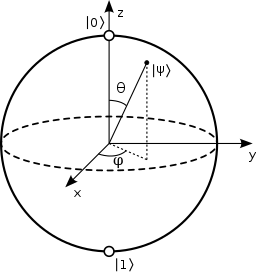





Where the scalars alpha and beta are used to see the amplitude of each state, or more generally, its probability to colapse over its respective state $|0\rangle$ or $|1\rangle$, which is like we could have all possible states at the same time, but we can only measure and see a small piece of this huge information.

### Quantum Superpostion and Entanglement

As we're dealing with quantum behavior some pretty important features of quantum mechanics that are used in quantum computing are the **Quantum Superposition** and the **Quantum Entanglement**. If were given to us a state $\psi$, when neither of its constants, lets say for example $\alpha$ and $\beta$, are null, we say that this state is in **superpostion**. More generally, which means that before a potential measure a phisical system is partially over all possible existants theoretical states.

$$
|\psi\rangle = a_0|0\rangle + a_1|1\rangle + \dots + a_{n-1}|n-1 \rangle = \sum_{i=0}^{n-1}a_i|i\rangle
$$

$$
\sum_{i = 0}^{n-1} |a_i|^2 = 1
$$

However when we measure it, it colapses to a unique state, so its like nature is doing a massive work, but it is willing to share with us just a small piece of it, a hint, for us to solve some very difficult problems.

The space of these vector states can be seen by tensor product of this system states, so if we've **n** components we can write those as 

$$
\begin{align*}
|\Psi\rangle &= |\psi_0\rangle \otimes |\psi_1\rangle \otimes \dots \otimes |\psi_{n-1}\rangle\\
             &= |\psi_0\rangle |\psi_1\rangle \dots |\psi_{n-1}\rangle\\
             &= |\psi_0 \psi_1 \dots \psi_{n-1}\rangle
\end{align*}
$$

If a state can not be writen by the tensor product of other states we've that this states is **entangled**, so as the wellknown Bell-State


$$
\begin{align*}
|\Psi\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
\end{align*}
$$


Where if we measure one of the Qubits we know exactly the state of the other, even if the other Qubit is in the other side of the galaxy, with is forbidden by the theory of relativity, since it would be faster then the speed of light, which is known as the *EPR Paradox*.

### Programming with Quantum Gates

While Classical Computers works with simple boolean operators like *NOT, NAND, XOR, AND, OR*, Quantum Computers works with Quantum Gates, which mathematically speaking are unitary operators, that manipulates our state, so let $\mathcal{U}$ be our unitary operator and $|\psi\rangle$ our qubit.

$$
UU^\dagger = I
$$

$$
|\psi\rangle \rightarrow \mathcal{U}|\psi\rangle
$$

$$
|||\psi\rangle|| = ||\mathcal{U}|\psi\rangle|| = 1
$$

In this context the gates that we'll use are those that work in an unique qubit, therefore our operators will be defined by $M_{2x2}$ matrices over a state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, and some of those operators are the Pauli Matrices, which besides its importance all over quantum computing, they are going to have a great importance to the understanding of the Deutsch-Jozsa Algorithm.


$$
\sigma_I = I = \begin{bmatrix}
                1 & 0 \\
                0 & 1
               \end{bmatrix}
$$

$$
\sigma_X = X = \begin{bmatrix}
                0 & 1 \\
                1 & 0
               \end{bmatrix}
$$

$$
\sigma_Y = Y = \begin{bmatrix}
                0 & -i \\
                i & 0
               \end{bmatrix}
$$

$$
\sigma_Z = Z = \begin{bmatrix}
                1 & 0 \\
                0 & -1
               \end{bmatrix}
               \\
$$

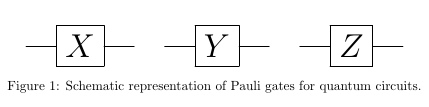


As we already settled superposition is a important feature in quantum computing, how we can solve problems over multiple states at the same time, so if we've a state $|0\rangle$ or $|1\rangle$ and want to put it on superposition we can apply we one of the most common and important quantum gates, the Hadarmard Gate, given by the matrix

$$
\begin{align*}
H &= \frac{1}{\sqrt{2}} \begin{bmatrix}
                       1 & 1\\
                       1 & -1
                       \end{bmatrix}\\\\
  &= \frac{|0\rangle + |1\rangle}{\sqrt{2}}\langle0| + \frac{|0\rangle - |1\rangle}{\sqrt{2}}\langle1|
\end{align*}
$$


Hence, if we apply this matrix on the states $|0\rangle$ or $|1\rangle$ we'll get the states $|+\rangle$ and $|-\rangle$ respectively



$$
\begin{align*}
\\H|0\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}
                                   1 & 1\\
                                   1 & -1
                                \end{bmatrix} 
                                %
             \begin{bmatrix}
             1 \\
             0
             \end{bmatrix}
             =
             \frac{|0\rangle + |1\rangle}{\sqrt{2}}
             =
             |+\rangle
\\\\H|1\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}
                                   1 & 1\\
                                   1 & -1
                                \end{bmatrix} 
                                %
             \begin{bmatrix}
             0 \\
             1
             \end{bmatrix}
             =
             \frac{|0\rangle - |1\rangle}{\sqrt{2}}
             =
             |-\rangle
\end{align*}
$$

Which are the resultant states after we put them on superposition. And since $H$ = $H^\dagger$, when we apply $HH^\dagger|\psi\rangle = HH^\dagger|\psi\rangle = |\psi\rangle $, it restores it to the original input state.

## The Deutsch-Jozsa Algorithm

The Deutsch-Jozsa Algorithm was one of the first algorithms to show a improvement over the classical solution to find whether a function is balanced or constant. Even though the algorithm does not has a important application on real life it show us in a very simple way how this new kind of computing can improve our classical computers algorithm solutions.

The functions that will be considerend in this algorithm are those that maps a input $\{0, 1\}^{n}$ to an output $\{0, 1\}$, i.e, $\   \mathcal{f}:\ \{0, 1\}^n \mapsto \{0, 1\}$ , a function is called balanced if exactly half of its inputs give us an output equal to **0** and the other half equals **1**, otherwise if all outputs are equal 0 or equal 1 we've a constant function.

$$
\begin{align*}
Constant:\ & f(0, 0) = 1 && f(0, 1) = 1  && f(1, 0) = 1 && f(1, 1) = 1 \\
Constant:\ & f(0, 0) = 0 && f(0, 1) = 0  && f(1, 0) = 0 && f(1, 1) = 0 \\
Balanced:\ & f(0, 0) = 1 && f(0, 1) = 0  && f(1, 0) = 1 && f(1, 1) = 0 \\
Balanced:\ & f(0, 0) = 0 && f(0, 1) = 1  && f(1, 0) = 0 && f(1, 1) = 1 
\end{align*}
$$

However, even being the "Hello World" of the Quantum Algorithms, the The Deutsch-Jozsa Algorithm is not as simple as it looks like. Therefore, as we already discussed the quantum circuits works by applying several unitary matrices operations over a quantum state on the computational basis.

$$
|0\rangle = \begin{bmatrix}
                1 \\
                0
            \end{bmatrix}
$$

$$
|1\rangle = \begin{bmatrix}
                0 \\
                1
            \end{bmatrix}
$$

We can apply our operations over several qubits, i.e, over the tensor product of simpler, in order to get more complex systems and inputs. Therefore we can introduce the Deutsch-Jozsa Algorithm Circuit.

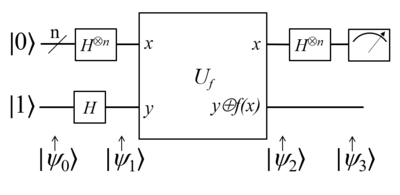

**Firstly** we can itialize our register as the tensor product of **n** $|0\rangle$ states and one $|1\rangle$ that will be used to give us what is called a kick-back, therefore:

$$
\begin{align*}
    |\psi_0\rangle & =  |0\rangle^{\otimes n} \otimes |1\rangle\\
                   & =  |0\rangle^{\otimes n} |1\rangle
\end{align*}
$$

The **second** step is to put our state in superposition, by applying Hadarmard gates in our input as it follows:

$$
\begin{align*}
    |\psi_1\rangle & =  H^{\otimes n}|0\rangle^{\otimes n} \otimes H|1\rangle\\
                   & =  H^{\otimes n}|0\rangle^{\otimes n} H|1\rangle\\
                   & =  |+\rangle^{\otimes n}|-\rangle\\
                   & = {\frac{1}{\sqrt{2^n}}}\sum_{x \in \{0, 1\}^{n}} |x\rangle\bigg(\frac{|0\rangle - |1\rangle}{\sqrt2}\bigg)
\end{align*}
$$

After that, the next step is to apply the $U_f$ oracle, which is the main function in our circuit that give us if our input function is balanced or constant, but this result it not be observable yet. 

$$
\begin{align*}
    |\psi_2\rangle 
                   & = {\frac{1}{\sqrt{2^n}}}\mathrm{U_f}\bigg(\sum_{x \in \{0, 1\}^{n}} |x\rangle\bigg(\frac{|0\rangle - |1\rangle}{\sqrt2}\bigg)\bigg)
\end{align*}
$$

The function will not change the first **n** qubits, but the second one will be changed as it follows:

$$
\begin{align*}
    |\psi_2\rangle 
                   & = {\frac{1}{\sqrt{2^n}}}\sum_{x \in \{0, 1\}^{n}} |x\rangle\bigg(\frac{|0 \oplus f(x)\rangle - |1 \oplus f(x)\rangle}{\sqrt2}\bigg)\\
                   & \equiv {\frac{1}{\sqrt{2^n}}}\sum_{x \in \{0, 1\}^{n}} (-1)^{f(x)} |x\rangle\bigg(\frac{|0\rangle - |1\rangle}{\sqrt2}\bigg) & \text{The kickback give us this formulation}\\
                   & \equiv {\frac{1}{\sqrt{2^n}}}\sum_{x \in \{0, 1\}^{n}} (-1)^{f(x)} |x\rangle &\text{            Ignoring the second qubit}\\
\end{align*}
$$

Now that we already have our $U_f$ oracle function output for the first **n** qubits remains to us only to apply the Hadamard Gate on it and to measure the result. The general formulation for applying the Hadarmard gate on n qubit on superposition is given by

$$
|\psi_3\rangle = \frac{1}{2^n}\sum_{x \in \{0, 1\}^n}(-1)^{f(x)}\sum_{z \in \{0, 1\}^n} (-1)^{\langle x, z\rangle}|x\rangle
$$

Then, when $f(x)$ is balance $z = |00000 \dots 0\rangle$ the inner procuct sum will cancel each other term by term, which will give us that the amplitude to find the result on the state $|0000 \dots 0\rangle$ is null. Otherwise, we have a constant function and the amplitude of $|0000 \dots 0\rangle$ after the result on the measurement is either 1 or -1, which is a 1 probability of finding it on the state $|0000 \dots 0\rangle$.

## Example

Lets do a small example to see how it work properly for one random function in the required format, so as 

$$
    f(0, 0) = 0\\
    f(0, 1) = 1\\
    f(1, 0) = 1\\
    f(0, 0) = 0
$$

We know that this is a balanced function, since it is a pretty small example, but the algorithm still blinded for it.

We will need three Qubits in our input, where there first two will be equal to $|0\rangle$ and the third one will be $|1\rangle$.

$$
\begin{align*}
    |\psi_0\rangle & =  |0\rangle^{\otimes 2} \otimes |1\rangle\\
                   & =  |0\rangle^{\otimes 2} |1\rangle\\
                   & =  |00\rangle|1\rangle
\end{align*}
$$

Now we must apply the Hadarmard Gates on it as it follow 

$$
\begin{align*}
    |\psi_1\rangle & =  H^{\otimes 2}|00\rangle H|1\rangle\\
                   & = |+\rangle^{\otimes 2}|-\rangle\\
                   & = \bigg(\frac{|0\rangle + |1\rangle}{\sqrt{2}}\bigg)\otimes\bigg(\frac{|0\rangle + |1\rangle}{\sqrt{2}}\bigg)\otimes\bigg(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\bigg)\\
                   & = \frac{1}{2}\bigg(|00\rangle + |01\rangle + |10\rangle + |11\rangle\bigg)\otimes\bigg(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\bigg)\\
                   & = \frac{1}{2}\bigg(|00\rangle + |01\rangle + |10\rangle + |11\rangle\bigg)\bigg(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\bigg)
\end{align*}
$$

Now that we've our state on superpostion we must apply the $U_f$ function on the state $|\psi_1\rangle$, so that

$$
\begin{align*}
|\psi_2\rangle & = \frac{1}{2}\bigg(|00\rangle + |01\rangle + |10\rangle + |11\rangle\bigg)U_f\bigg(\bigg(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\bigg)\bigg)\\
               & = \frac{1}{2\sqrt{2}} \sum_{x \in \{0, 1\}^2} |x\rangle \bigg(|0 \oplus f(x)\rangle - |1 \oplus f(x)\rangle\bigg)\\
               & = \frac{1}{2\sqrt{2}}\bigg[|00\rangle \bigg(|0\rangle - |1\rangle\bigg) - |01\rangle \bigg(|0\rangle - |1\rangle\bigg) - |10\rangle \bigg(|0\rangle - |1\rangle\bigg) + |11\rangle \bigg(|0\rangle - |1\rangle\bigg)\bigg]
\end{align*}
$$

Now as we did at the explanation above we will ignore the last Qubit and evaluate our circuit only by the first **n** Qubits.

$$
  |\psi_2\rangle = \frac{1}{2}\bigg[|00\rangle - |01\rangle - |10\rangle + |11\rangle\bigg]
$$

Then remain to us only to apply the Hadamard Gate on this state to get our result, in order to make it simpler we will use the matrix notation of the Hadamard $H^{\otimes 2}$ to get the computation result.

$$
\begin{align*}
    |\psi_3\rangle & =  H^{\otimes 2}|\psi_2\rangle\\ 
                & = \begin{bmatrix}
                      1 & 1 & 1 & 1\\
                      1 & -1 & 1 & -1\\
                      1 & 1 & -1 & -1\\
                      1 & -1 & -1 & 1
                      \end{bmatrix}%
                      \frac{1}{2}
                      %
                     \begin{bmatrix}
                      1\\
                      -1\\
                      -1\\
                      1
                      \end{bmatrix}\\
                 & = |11\rangle
\end{align*}
$$

Where the measurement on the first two Qubits will be strictly different then $|00\rangle$, therefore our function is balanced, as expected.

## Implemention

Now that we understand how the algorithm works and saw a small example we can use the Qiskit library to simulate it and observe the results, comparing it with our theoretical explanations. 

In [2]:
'''
RANDOM EXAMPLE BASED ON IBM
QISKIT TUTORIAL EXAMPLE
reference: https://community.qiskit.org/textbook/ch-algorithms/deutsch-josza.html
'''

#n is the number of elements needed in the function input
n = 5

#define the oracle type, i.e, if our function is constant or balanced
oracle = "b"

#if is balanced we define which of the vector 2**n will held
#the algorithm result
if oracle == "b":
    b = np.random.randint(1,2**n) 
    
#if it's constant we set randomly if the results are 0 or 1
if oracle == "c":
    c = np.random.randint(2)

#set n_qbits as the number of quantum register on the input
#and the classical register as n_bits
n_qbits = QuantumRegister(n+1)
n_bits = ClassicalRegister(n)

#build the circuit based on it
djAlgCircuit = QuantumCircuit(n_qbits, n_bits)

#as we need a |1> qbit to do the kickback in our circuit
#we apply the X operator on the last |0> qbit to flip its
#entrie and change it to |1>
djAlgCircuit.x(n_qbits[n])

#Apply this in order to viasualize our oracle on the 
#circuit plot

#Apply the Hadarmard gates on the n qbits and put them
#on the superposition state
djAlgCircuit.h(n_qbits)    

djAlgCircuit.barrier()

#If it is constants just flip the value of the last qbit to 0 if c is one,
#Apply the identity otherwise
#If it is balanced we will shift the bits and apply the CNOT operator at the
#marked position b and the last qbit, it works like our $|y \oplus f(x)>$
if oracle == "c": 
    if c == 1:
        djAlgCircuit.x(n_qbits[n])
    else:
        djAlgCircuit.iden(n_qbits[n])
else:  
    for i in range(n):
        if (b & (1 << i)):
            djAlgCircuit.cx(n_qbits[i], n_qbits[n])


djAlgCircuit.barrier()

#Apply the Hadamard gates to get our result
for i in range(n):
    djAlgCircuit.h(n_qbits[i])

#Measure the amplitude of the first n qbits
for i in range(n):
    djAlgCircuit.measure(n_qbits[i], n_bits[i])
    
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(djAlgCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

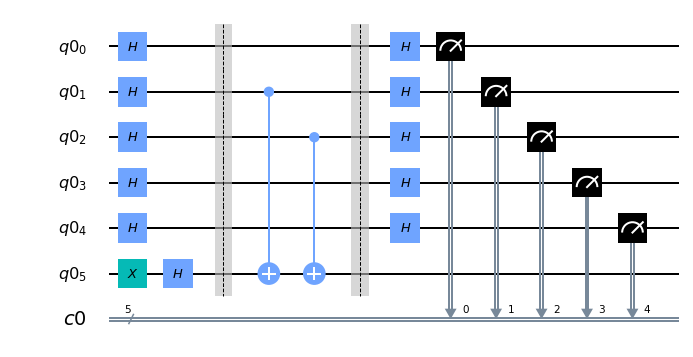

In [3]:
djAlgCircuit.draw(output='mpl')

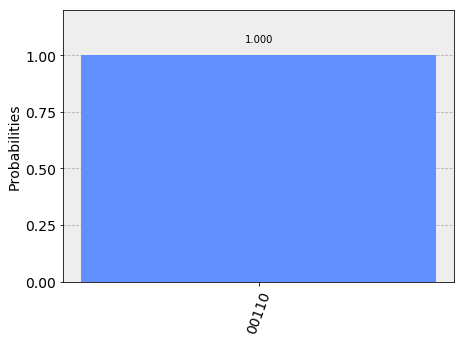

In [4]:
plot_histogram(answer)

In [5]:
'''
CODE OF THE EXAMPLE
DESCRIBED ABOVE

f(0, 0) = 0 / f(0, 1) = 1 / f(1, 0) = 1 / f(1, 1) = 0

balanced function
'''

size = 2
m = 3

#Initialize registers
qb_rg = QuantumRegister(size+1)
b_rg = ClassicalRegister(size)

#Build Circuit
exDjCircuit = QuantumCircuit(qb_rg, b_rg)

#Apply X gate on the last one
exDjCircuit.x(qb_rg[size])

#Apply H gates
exDjCircuit.h(qb_rg)

exDjCircuit.barrier()

#Apply CNOT gate in function of m
for i in range(size):
    if (m & (1 << i)):
        exDjCircuit.cx(qb_rg[i], qb_rg[size])

exDjCircuit.barrier()

#Apply H gates
for i in range(size):
    exDjCircuit.h(qb_rg[i])

#Measure the first n qbits
for i in range(size):
    exDjCircuit.measure(qb_rg[i], b_rg[i])
    
bk = BasicAer.get_backend('qasm_simulator')
atp = 1024
res = execute(exDjCircuit, backend=bk, shots=atp).result()
ans = res.get_counts()

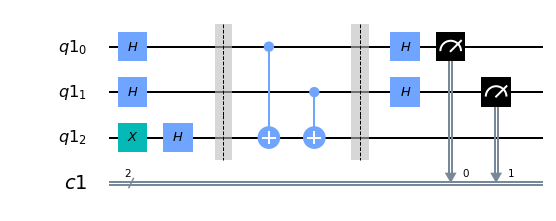

In [6]:
exDjCircuit.draw(output='mpl')

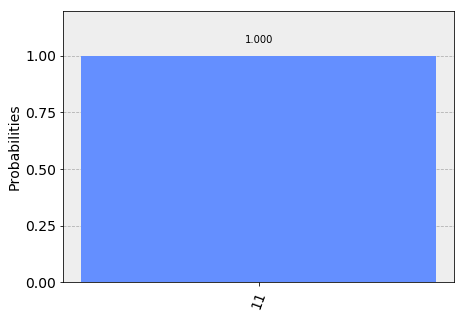

In [7]:
plot_histogram(ans)

### References

__[Wikipedia Deutsch-Jozsa Algorithm](https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm)__\
__[QC - Quantum Computing Series](https://medium.com/@jonathan_hui/qc-quantum-computing-series-10ddd7977abd)__\
__[Learn Quantum Computation using Qiskit](https://community.qiskit.org/textbook/)__